# Reading the input data from train.tsv of LIAR dataset

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import pylab as pl
import pandas as pd
%matplotlib inline
#%capture
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
path=r'train.tsv'
header = ["id","label","text","subject","person","title","state","party","barely true","false","half true","mostly true","pants on fire","context"]
print (len(header))
data = pd.read_csv(path, sep='\t',encoding='Latin1', names=header)
print (len(data))

14
10240


# dataset description

In [2]:
data.head(10)

,id,label,text,subject,person,title,state,party,barely true,false,half true,mostly true,pants on fire,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


# since its raw data, we have to do feature engineering
using one hot encoding to create several categorical features like below

In [11]:
data['democrat'] = data['party'].apply(lambda x : 1 if (x == 'democrat') else 0)
data['republican'] = data['party'].apply(lambda x : 1 if (x == 'republican') else 0)
data['content_about_hillary_clinton'] = data['text'].apply(lambda x: 1 if 'hillary clinton' in str(x).lower() else 0)
data['content_about_bernie_sanders'] = data['text'].apply(lambda x: 1 if 'bernie' in str(x).lower() else 0)
data['is_it_about_abortion'] = data['subject'].apply(lambda x: 1 if 'abortion' in str(x).lower() else 0)
data['health-care'] = data['subject'].apply(lambda x: 1 if 'health-care' in str(x).lower() else 0)
data['economy'] = data['subject'].apply(lambda x: 1 if 'economy' in str(x).lower() else 0)
data['climate-change'] =data['subject'].apply(lambda x: 1 if 'climate-change' in str(x).lower() else 0)
data['blog-posting'] = data['person'].apply(lambda x: 1 if ('blog-posting' in str(x).lower()) else 0)
data['CNN_channel'] =data['context'].apply(lambda x: 1 if 'cnn' in str(x).lower().split() else 0)
data['gays-and-lesbians'] = data['subject'].apply(lambda x: 1 if 'gays-and-lesbians' in str(x).lower().split() else 0)
data['state_is_california'] =data['state'].apply(lambda x: 1 if 'california' in str(x).lower() else 0)

## Set target label
## if story is false or barely true, give 0 else give 1 for true news
data['label_value'] = data['label'].apply(lambda x: 0 if (x=='false' or 'barely' in x) else 1)


In [12]:
features = [ 'gays-and-lesbians', 'blog-posting','state_is_california','CNN_channel','climate-change','pants on fire','economy','health-care','is_it_about_abortion','content_about_bernie_sanders','content_about_hillary_clinton', 'democrat', 'republican']
print (len(features))

13


In [13]:
from sklearn import preprocessing
X = data[features]
scaler = preprocessing.MinMaxScaler()
Y = data[['label_value']]
X = X.fillna(0);
Y = Y.fillna(0);
scaled_X = scaler.fit_transform(X)
scaled_Y = scaler.fit_transform(Y)

# Logistic regression training on the dataset

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_Y, test_size=0.3, random_state=0)
lm = linear_model.LogisticRegression(verbose=1)
model = lm.fit(X_train, y_train)
print (model)
predictions = lm.predict(X_test)

print ("Score:", model.score(X_test, y_test))

[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)
Score: 0.6344401041666666


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
for i in range(0, len(model.coef_[0])):
    print (features[i],model.coef_[0][i])

gays-and-lesbians -0.13852111644981632
blog-posting 0.029186969185132933
state_is_california 0.23913840900976718
CNN_channel -0.07378587149551931
climate-change -0.40277279430845864
pants on fire -0.16738504664428405
economy 0.17395063912556333
health-care -0.31605232101164926
is_it_about_abortion 0.04039383808932085
content_about_bernie_sanders 0.25835097613090585
content_about_hillary_clinton -0.4148316361911769
democrat 0.21444944810084882
republican -0.3377696631266433


<h1> Logistic Regression coefficients </h1>
<font color=red>
    <h3> Negative coefficients indicating these factors cause fake news </h3>   
<h4>news is about gays-and-lesbians -0.13852111644981632 <br>
interview is on CNN_channel -0.07378587149551931 <br>
context is climate-change -0.40277279430845864<br>
speaker pants on fire -0.16738504664428405<br>
context is health-care -0.31605232101164926<br>
content_about_hillary_clinton -0.4148316361911769<br>
party is republican -0.3377696631266433<br>
    </font>
    <font color=green>
        <h3> Positive coefficients indicate these factors do not cause fake news  </h3> <h4>
party is democrat 0.21444944810084882<br>
is_it_about_abortion 0.04039383808932085<br>
content_about_bernie_sanders 0.25835097613090585<br>
subject is economy 0.17395063912556333<br>
news blog-posting 0.029186969185132933 <br>
newsource: state_is_california 0.23913840900976718 <br>
   </font>

</h4>

In [204]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=5, min_samples_leaf=6)
features_for_dt = [ 'gays-and-lesbians','climate-change','republican', 'health-care','content_about_hillary_clinton']
X_DT = X[features_for_dt]
clf_gini.fit(X_DT,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

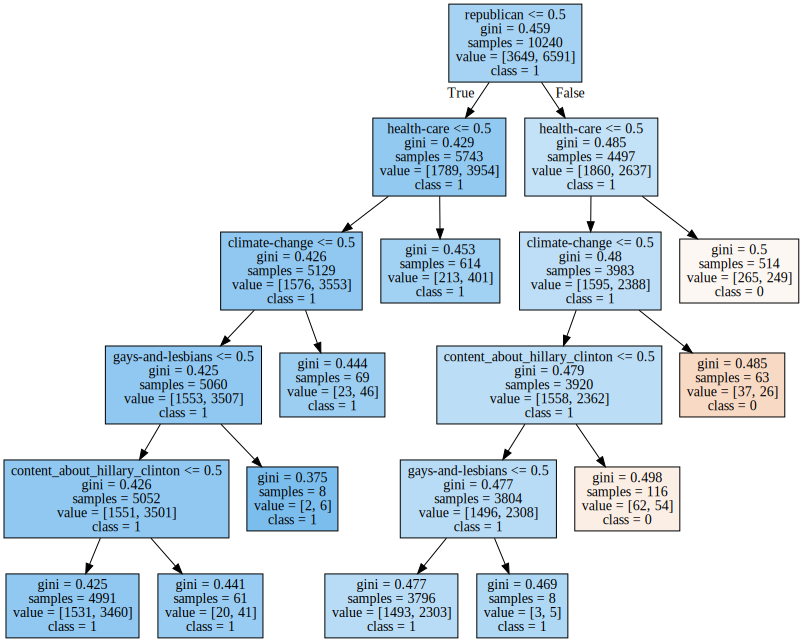

In [205]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# class labels
labels = features_for_dt

graph = Source(tree.export_graphviz(clf_gini, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

<h1>Based on the dataset, we can say that </h1>
<h2>if someone affiliated to republican party and talks about climate change, then its fake news (gini index=0.5) </h2>
<h2>if someone affiliated to republican party and talks about health-care, then its fake news (gini index = 0.48) </h2>
<h2>if someone affiliated to republican party and talks about hillary-clinton then its take news (gini index=0.479) </h2>